# Practice OCR using layout parser

First load required imports and create input/output folder paths

In [35]:
import layoutparser as lp
import pytesseract
import os
import cv2
from glob import glob
from pdf2image import convert_from_path
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

ocr_agent = lp.TesseractAgent(languages='eng')

#Define working directory
fldr = "/home/martin/new_jersey_arbitration/ocr_IA"
os.chdir(fldr)

#Folder of pdfs:
pdf_folder = os.path.join(os.getcwd(),'pdf','')

#Temp folder to save images
image_folder = os.path.join(os.getcwd(), 'temp','')

#Secondary temp folder: for preprocessed images
image_folder_thresh = os.path.join(os.getcwd(), 'thresh','')

#Folder of text results
text_folder = os.path.join(os.getcwd(), 'text', '')

#Pdf files
pdf_files = glob(pdf_folder + '/*.pdf')

For the purpose of this test, we will practice one just one page of a pdf:

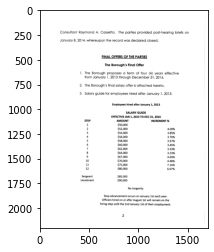

In [39]:
file = pdf_files[7]
filename = file.split('.pdf')[0].split('/')[-1]
images = convert_from_path(file)
image = images[2]
opencvImage = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
plt.imshow(opencvImage)

In [46]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

config.yaml?dl=1: 8.19kB [00:01, 7.80kB/s]
model_final.pth?dl=1: 856MB [09:24, 1.52MB/s]                                                        


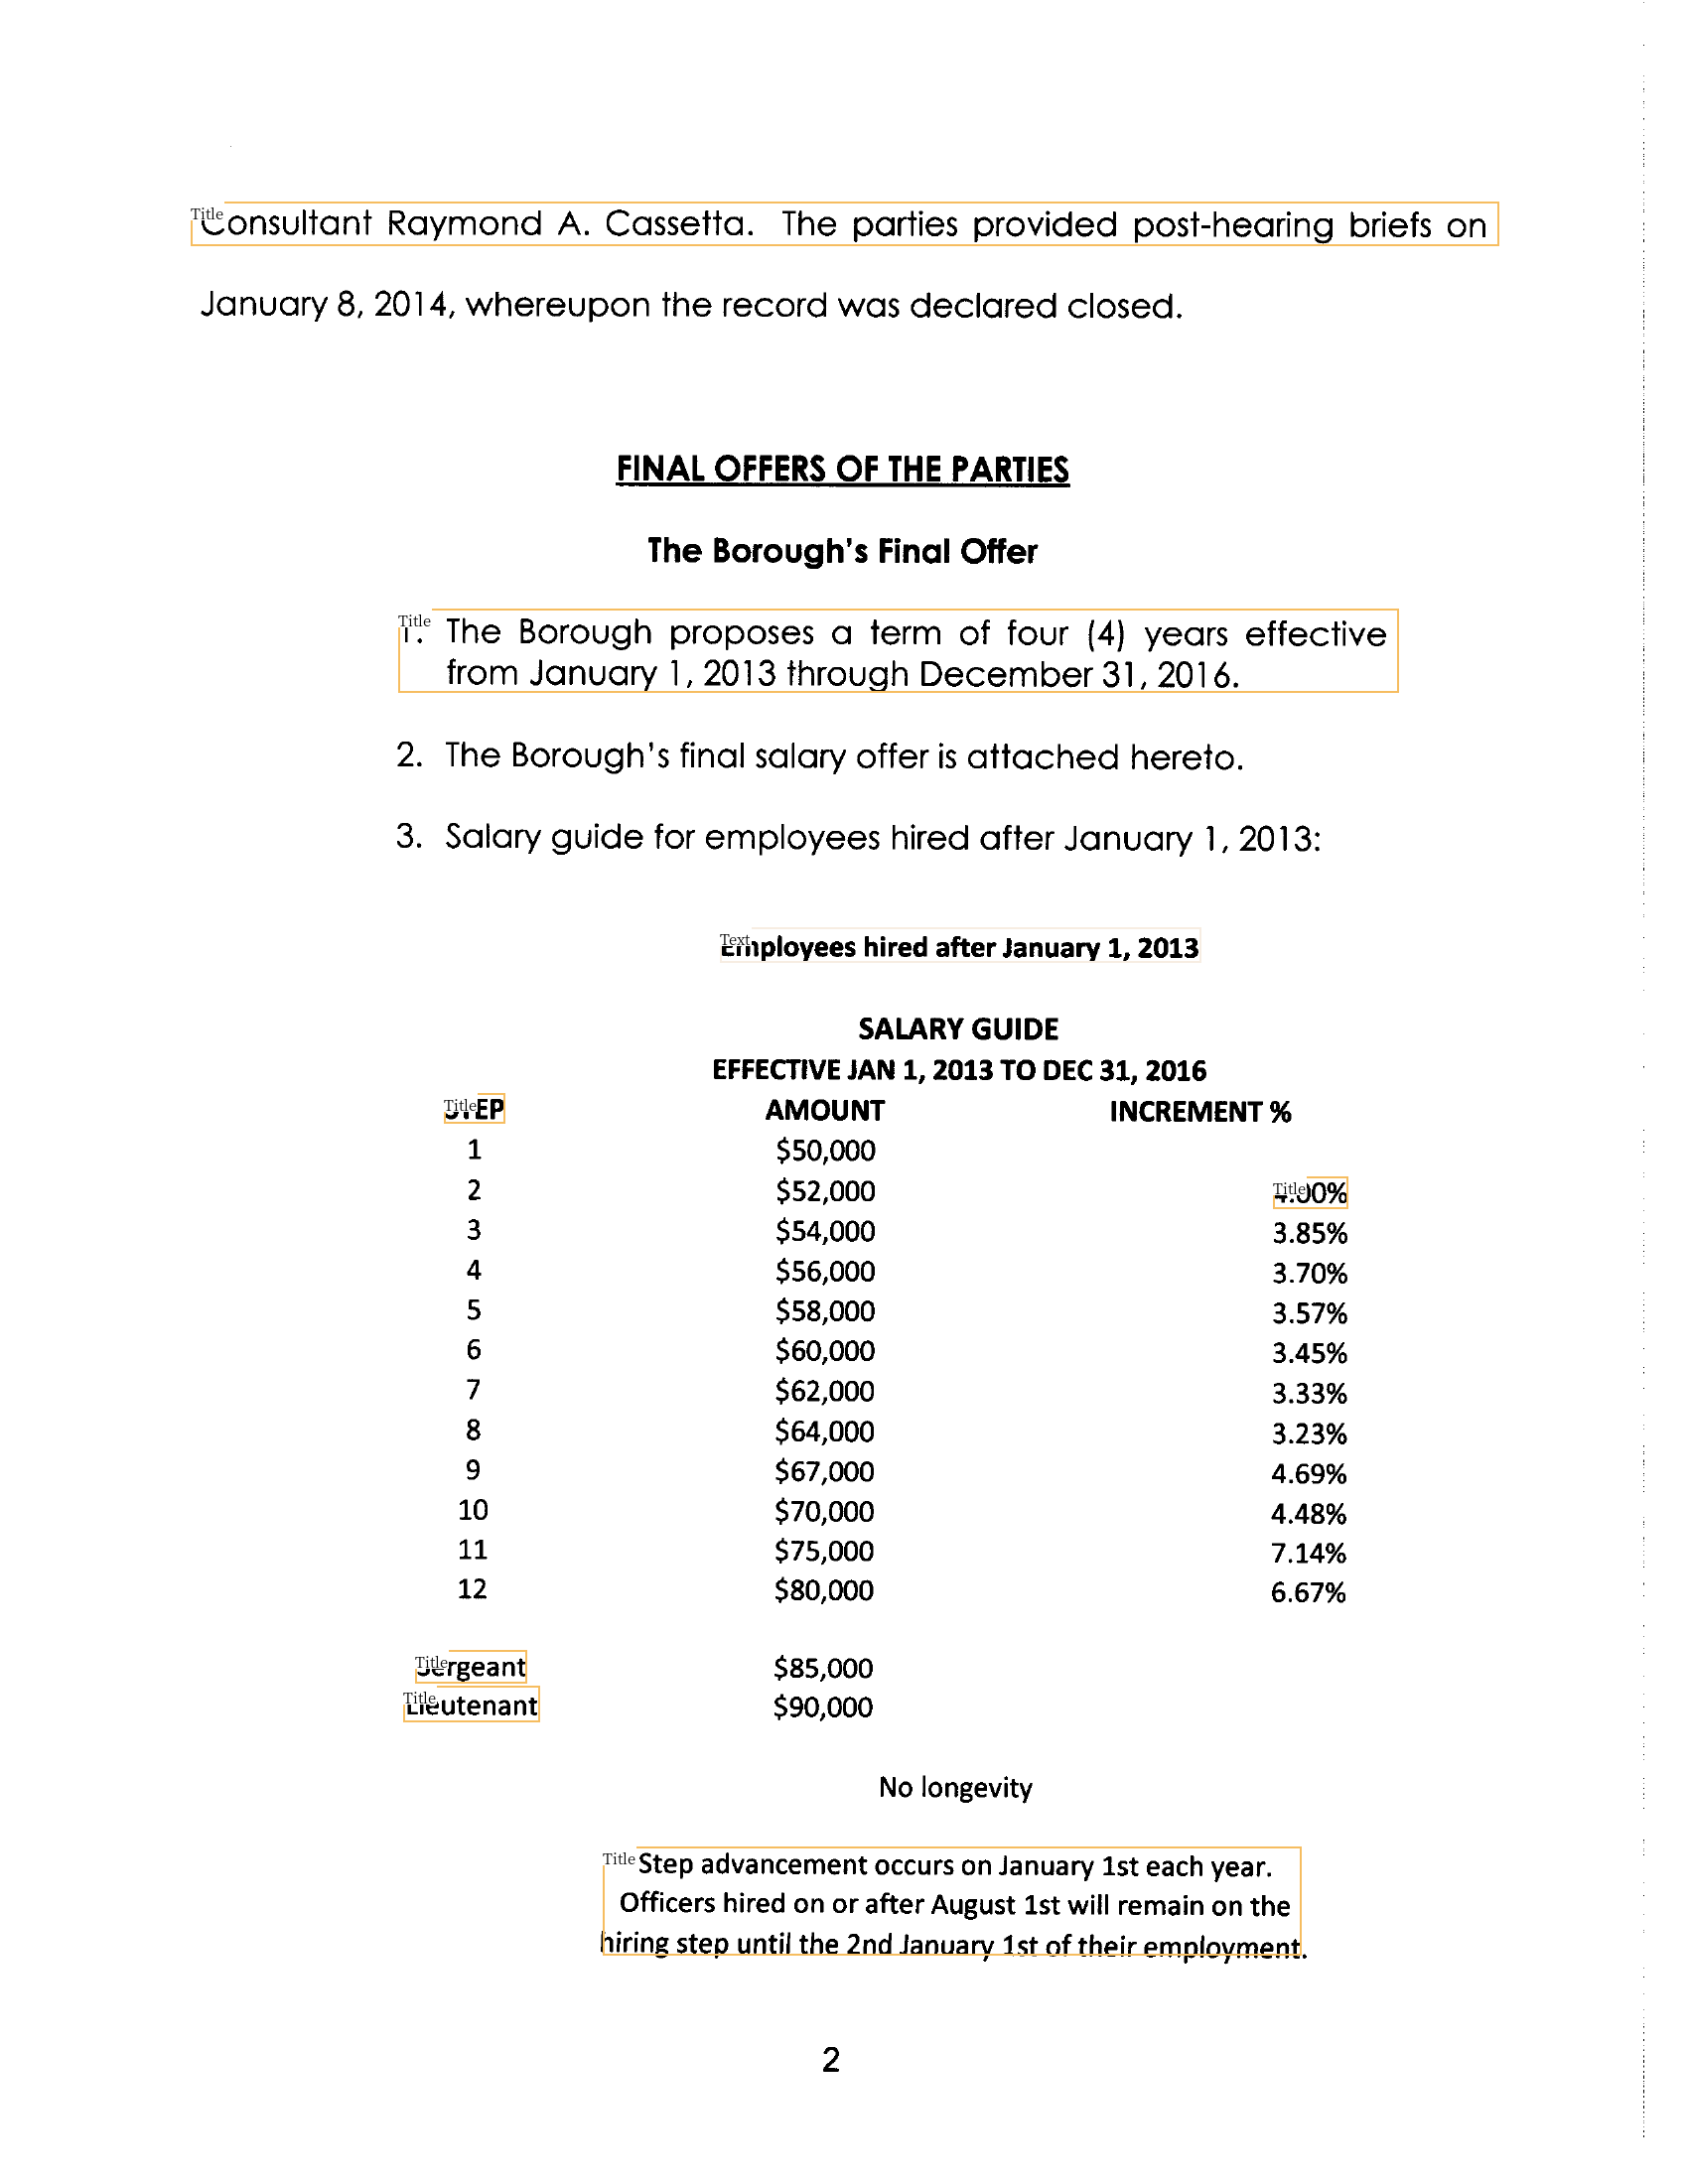

In [51]:
layout = model.detect(image)
lp.draw_box(image, layout, box_width=2, show_element_type=True)